<a href="https://colab.research.google.com/github/Labannya1038/Machine-Learning/blob/main/Arrhythmia_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# URL to UCI Arrhythmia dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"

# Load dataset
arr = pd.read_csv(url, header=None)

# Show shape
print("Shape:", arr.shape)
arr.head()


Shape: (452, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


# **Preprocessing**
Handle missing values








In [ ]:
# Replace "?" with NaN
arr = arr.replace('?', np.nan)

# Convert all columns to numeric
arr = arr.apply(pd.to_numeric)

# Check how many missing per column
print(arr.isnull().sum().sort_values(ascending=False))


13    376
11     22
10      8
14      1
12      1
     ... 
91      0
90      0
89      0
88      0
96      0
Length: 280, dtype: int64


Simple Imputation (fill missing)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')  # use median for numeric
arr_imputed = pd.DataFrame(imp.fit_transform(arr), columns=arr.columns)
arr_imputed.isnull().sum().sum()  # should be 0

np.int64(0)

#  Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = arr_imputed.iloc[:, :-1]
y = arr_imputed.iloc[:, -1].astype(int)
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (361, 279) Test shape: (91, 279)


# **Scale the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# **Train a KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean')

# **Evaluation**
Accuracy + Classification Report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5824175824175825

Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.96      0.72        49
           2       0.00      0.00      0.00         9
           3       1.00      1.00      1.00         3
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       1.00      0.10      0.18        10
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.58        91
   macro avg       0.38      0.24      0.26        91
weighted avg       0.51      0.58      0.47        91



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix

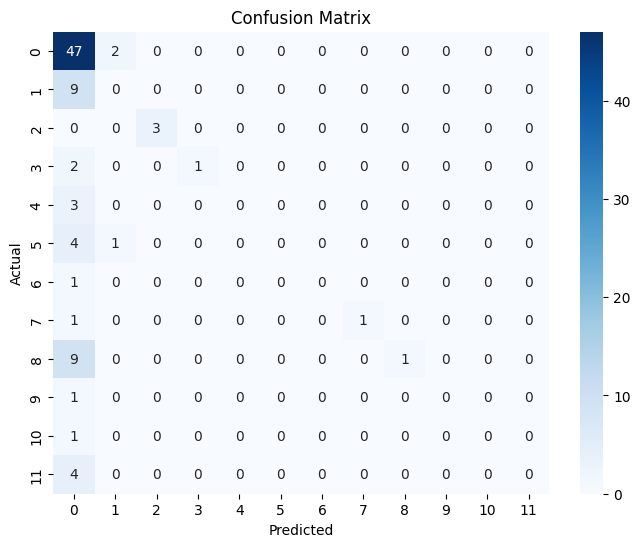

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


# **K-Fold Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, scaler.transform(X), y, cv=5, scoring='accuracy')
print("5-Fold CV accuracies:", scores)
print("Mean CV accuracy:", scores.mean())


5-Fold CV accuracies: [0.61538462 0.58241758 0.6        0.6        0.6       ]
Mean CV accuracy: 0.5995604395604397


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# **Try Different k (Hyperparameter Tuning)**

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklea

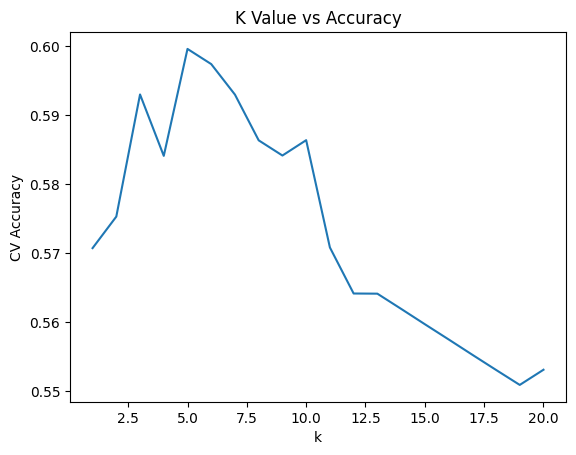

In [ ]:
import matplotlib.pyplot as plt

k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='accuracy').mean()
    cv_scores.append(score)

plt.plot(k_values, cv_scores)
plt.xlabel("k")
plt.ylabel("CV Accuracy")
plt.title("K Value vs Accuracy")
plt.show()


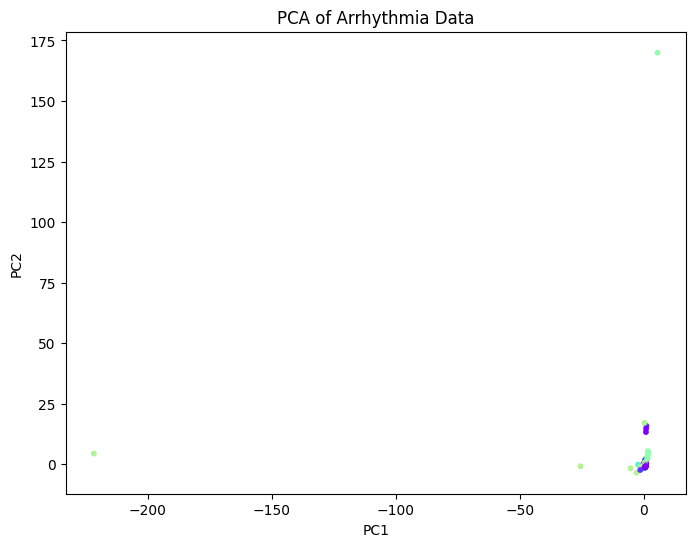

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.transform(X))

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='rainbow', s=10)
plt.title("PCA of Arrhythmia Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
